In [1]:
import random
import numpy as np
import pandas as pd
import time
import re
import datetime
import os
import matplotlib.pyplot as plt

# Process to one spreadsheet

In [45]:
dfs = dict()
path = 'data/raw/'
for file in os.listdir(path):
    if file[0] != '.':
        df = pd.read_excel(f'{path}{file}', index_col=0)
        df['dateSeen'] = pd.to_datetime(df['dateSeen'], unit='s', utc=True).dt.tz_localize(None)
        df = df[df['text'].apply(lambda x: isinstance(x, str) and x.lower().count('ukrain') >= 2)]
        df = df[df['dateSeen'].apply(lambda x: x <= pd.Timestamp(2022, 2, 23))]
        # print(file, len(df))
        df = df.drop_duplicates(subset=['title'])
        print(file, len(df))
        dfs[file] = df

apnews.com_07-17-2022_trial.xlsx 495
sputniknews.com_07-14-2022_trial.xlsx 921
reuters.com_07-15-2022_trial.xlsx 274
bbc.co.uk_07-15-2022_trial.xlsx 259
tass.com_07-14-2022_trial.xlsx 1430


In [ ]:
# apnews.com_07-17-2022_trial.xlsx 1052
# sputniknews.com_07-14-2022_trial.xlsx 1071
# reuters.com_07-15-2022_trial.xlsx 485
# bbc.co.uk_07-15-2022_trial.xlsx 340
# tass.com_07-14-2022_trial.xlsx 1704

In [46]:
westernDfs = pd.concat([dfs['apnews.com_07-17-2022_trial.xlsx'],dfs['reuters.com_07-15-2022_trial.xlsx'],dfs['bbc.co.uk_07-15-2022_trial.xlsx']])
print('initial', len(westernDfs))
westernDfs = westernDfs[westernDfs['text'].apply(lambda x: isinstance(x, str))]
westernDfs['category']= 'western'
westernDfs['textCharCt'] = westernDfs.apply(lambda x: len(x['text']),axis=1)
print('type text string', len(westernDfs))
westernDfs.tail()

initial 1028
type text string 1028


,newsOutlet,dateSeen,url,title,language,sourceCountry,text,category,textCharCt
425,bbc.co.uk,2022-02-22 08:00:00,https://www.bbc.co.uk/news/uk-politics-60476137,Boris Johnson promises first set of united kin...,English,United Kingdom,Boris Johnson says Russian actions in Ukraine ...,western,7405
427,bbc.co.uk,2022-02-20 08:00:00,https://www.bbc.co.uk/news/world-europe-604519...,Ukraine crisis : Russia keeps troops in Belaru...,English,United Kingdom,Russian President Vladimir Putin and his ally ...,western,4768
435,bbc.co.uk,2022-02-22 08:00:00,https://www.bbc.co.uk/news/av/world-europe-604...,Ukraine : Putin tells Russia spy chief to spea...,English,United Kingdom,President Vladimir Putin has pressed one of hi...,western,544
439,bbc.co.uk,2022-02-22 08:00:00,https://www.bbc.co.uk/news/business-60473233,Asia stocks fall as Ukraine - Russia tensions ...,English,United Kingdom,Oil and gas prices climbed on Tuesday on fears...,western,4965
463,bbc.co.uk,2022-02-22 08:00:00,https://www.bbc.co.uk/news/world-europe-60480734,Ukraine crisis : Germany halts pipeline as nat...,English,United Kingdom,Germany has put a stop to a key Russian gas pi...,western,5172


In [47]:
russianDfs = pd.concat([dfs['sputniknews.com_07-14-2022_trial.xlsx'],dfs['tass.com_07-14-2022_trial.xlsx']])

print('all types', len(russianDfs))

russianDfs = russianDfs[russianDfs['text'].apply(lambda x: isinstance(x, str))]
russianDfs['category']= 'russian'

russianDfs['textCharCt'] = russianDfs.apply(lambda x: len(x['text']),axis=1)
russianDfs = russianDfs.sort_values(by='textCharCt',ascending=False)

print('type text string', len(russianDfs))

russianDfs.head()

all types 2351
type text string 2351


,newsOutlet,dateSeen,url,title,language,sourceCountry,text,category,textCharCt
377,sputniknews.com,2021-12-31 08:00:00,https://sputniknews.com/20211231/so-that-was-2...,"So That Was 2021 ! Trump Leaves White House , ...",English,Russia,The year began with a riot at the Capitol in W...,russian,17621
615,sputniknews.com,2022-01-28 08:00:00,https://sputniknews.com/20220128/war-danger-bo...,"War Danger , Boorish Diplomacy , and U Cossac...",English,Russia,The Russian foreign minister sat down with the...,russian,14607
283,tass.com,2021-11-01 07:00:00,https://tass.com/pressreview/1356383,Press review : What to expect from COP26 and R...,English,NaN,The much-awaited Glasgow-hosted UN climate tal...,russian,12460
97,sputniknews.com,2021-11-15 08:00:00,https://sputniknews.com/20211115/wild-world-of...,Wild World of World Cup Qualification : How th...,English,Russia,The 2022 FIFA World Cup in Qatar will be the f...,russian,11499
1043,sputniknews.com,2022-02-21 08:00:00,https://sputniknews.com/20220221/russia-recogn...,Russia Recognises Donbass Republic Independence,English,Russia,"Earlier in the day, in an emergency session of...",russian,11482


### Write results to Excel

In [48]:
result = pd.concat([westernDfs, russianDfs])
print(len(result))
result.head()

3379


,newsOutlet,dateSeen,url,title,language,sourceCountry,text,category,textCharCt
0,apnews.com,2021-10-12 07:00:00,https://apnews.com/article/technology-business...,"EU , Ukraine to discuss military training and ...",English,United States,BRUSSELS (AP) — The European Union is consider...,western,3318
1,apnews.com,2021-10-12 07:00:00,https://apnews.com/cdfd9b277f6bade5697e0427429...,Blinken reaffirms US support for Ukraine amid ...,English,United States,"KYIV, Ukraine (AP) — U.S. Secretary of State A...",western,6032
2,apnews.com,2021-10-11 07:00:00,https://apnews.com/90b50e622cefcbaeba96cb5e716...,"EU , Ukraine to discuss military training and ...",English,United States,BRUSSELS (AP) — The European Union is consider...,western,3318
3,apnews.com,2021-10-06 07:00:00,https://apnews.com/0b689a7baaac58603e4d7453aa5...,Ukraine Holocaust center names Nazi Babi Yar k...,English,United States,"KYIV, Ukraine (AP) — The presidents of Ukraine...",western,3646
4,apnews.com,2021-10-13 07:00:00,https://apnews.com/89d2455274aad5fe166445a5f82...,Ukraine separatist areas overwhelmed by soarin...,English,United States,"KYIV, Ukraine (AP) — The Russia-backed separat...",western,2184


In [49]:
result.to_excel(f'Jul21_{len(result)}_articles.xlsx')

## Additional analyses

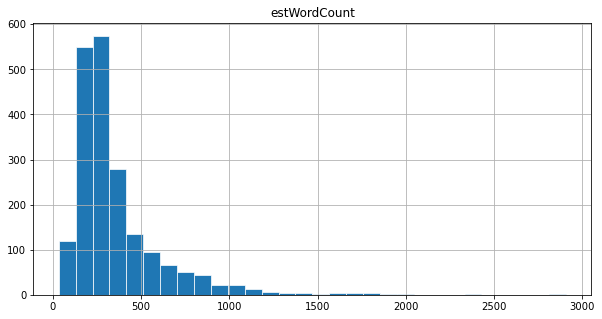

In [20]:
# Count words
def getWordCount(text):
    if type(text) == str:
        return len(text.split(' '))
    else:
        return 0

df = russianDfs.sample(n=2000,random_state=1)
df['estWordCount'] = df['text'].apply(getWordCount)

fig = plt.figure(figsize = (10,5))
ax = fig.gca()
# ax.xaxis.set_ticks(list(range(0,6000,300)))  
hist = df.hist(column='estWordCount',bins=30,ax=ax,edgecolor='white',linewidth=.7)

In [21]:
df = westernDfs.sample(n=1877,random_state=1)
df['estWordCount'] = df['text'].apply(getWordCount)

fig = plt.figure(figsize = (10,5))
ax = fig.gca()
# ax.xaxis.set_ticks(list(range(0,6000,300)))  
hist = df.hist(column='estWordCount',bins=30,ax=ax,edgecolor='white',linewidth=.7)

ValueError: Cannot take a larger sample than population when 'replace=False'

In [105]:
result = pd.concat([westernDfs.sample(n=1877,random_state=1), russianDfs[:1880]])
print(len(result))
result.head()

3757


,newsOutlet,dateSeen,url,title,language,sourceCountry,text,category,textCharCt
182,reuters.com,2021-11-04 07:00:00,https://www.reuters.com/world/europe/ukraine-a...,Ukraine appoints new defence minister amid scr...,English,United States,Ukraine's Deputy Prime Minister Oleksii Reznik...,western,2367
626,apnews.com,2022-01-24 08:00:00,https://apnews.com/article/russia-ukraine-russ...,Analysis : Crisis in Ukraine a showdown of two...,English,United States,NEW YORK (AP) — The crisis in Ukraine is hardl...,western,7512
607,apnews.com,2022-01-28 08:00:00,https://apnews.com/article/russia-ukraine-pola...,Poland says Russia - Ukraine tensions not seen...,English,United States,"WARSAW, Poland (AP) — Russian troop movements ...",western,1568
668,apnews.com,2022-01-25 08:00:00,https://apnews.com/article/us-sanction-options...,EXPLAINER : What are US options for sanctions ...,English,United States,WASHINGTON (AP) — The financial options being ...,western,6789
28,bbc.co.uk,2021-10-30 07:00:00,https://www.bbc.co.uk/news/world-europe-59076157,La Palma volcano survivors shaken but determin...,English,United Kingdom,Watch: 'Sometimes it feels like a war zone' Im...,western,5350


### Article review

In [40]:
random.choice(westernDfs['text'].tolist())

'MOSCOW, Nov 13 (Reuters) - President Vladimir Putin said on Saturday that Belarus had not consulted him before raising the possibility of cutting Russian natural gas flows to Europe, adding that such a move would risk harming ties between Minsk and its key ally Moscow. Belarusian President Alexander Lukashenko threatened on Thursday to retaliate against any new European Union sanctions against Minsk over a migrant standoff on the Belarus-EU border, suggesting he could halt the transit of gas and other goods via Belarus.  read more His warning briefly lifted spot gas prices  in Europe, which gets about a third of its supplies of the fuel from Russia, including via the Yamal-Europe pipeline that runs through Belarus to Poland and Germany.  read more The Belarusian section of the Yamal-Europe pipeline is owned by Russia\'s state gas monopoly, Gazprom (GAZP.MM). "I\'ve recently spoken to (Lukashenko) twice and he didn\'t mention this to me once, he didn\'t even hint," Putin said in a stat

In [45]:
random.choice(russianDfs['text'].tolist())

'Anti-war activists rallied outside the White House in Washington, DC, on Thursday to demand that the Biden administration stop antagonizing Russia, risking war between two nuclear-armed powers. They chanted “no war on Russia” and “disband NATO” and carried banners saying the same as tourists visiting the US capital city gathered around and joined the demonstration, which swelled to several dozen people. The rally was called by some of the United States’ most active antiwar groups, including Code Pink, the Black Alliance for Peace, and the Act Now to Stop War and End Racism (ANSWER) Coalition. "Negotiate, don\'t escalate" pic.twitter.com/eTT3J6IyOB— Morgan Artyukhina (@LavenderNRed) January 27, 2022 “Have we not learned our lesson from Afghanistan and Iraq?” asked Olivia DiNucci, a Code Pink member and one of the organizers of the demonstration. “I was 11 when the US went into Afghanistan, and 20 years later, we’ve spent $21 trillion on war. Destruction of people, the planet, surveilla

# Converting to event-based data sample for LIWC

In [53]:
belarusWest = westernDfs[westernDfs['text'].apply(lambda x: 'belarus' in x.lower() or 'lukashenko' in x.lower())]
print(len(belarusWest))
belarusRus = russianDfs[russianDfs['text'].apply(lambda x: 'belarus' in x.lower() or 'lukashenko' in x.lower())]
print(len(belarusRus))
belarusRus.head()

412
233


,newsOutlet,dateSeen,url,title,language,sourceCountry,text,category
9,sputniknews.com,2021-10-15 07:00:00,https://sputniknews.com/20211015/us-asks-russi...,US Asks Russia to Do More for EU Energy Secu...,English,Russia,"On Wednesday, Russian President Vladimir Putin...",russian
26,sputniknews.com,2021-10-29 07:00:00,https://sputniknews.com/20211029/kiev-claims-i...,Kiev Claims It Using Turkish - Made Combat Dro...,English,Russia,"On Tuesday, the Ukrainian military released a ...",russian
58,sputniknews.com,2021-11-14 08:00:00,https://sputniknews.com/20211114/charge-of-the...,Charge of the Light Brigade II ? united kingdo...,English,Russia,UK Chief of Defence Staff Nick Carter warned S...,russian
66,sputniknews.com,2021-11-13 08:00:00,https://sputniknews.com/20211113/what-goals-ar...,What Goals are DC & Kiev Pursuing by Peddling ...,English,Russia,US officials had warned their European counter...,russian
67,sputniknews.com,2021-11-13 08:00:00,https://sputniknews.com/20211113/putin-recalls...,Putin Recalls How Ukraine Cut Off Gas Supplies...,English,Russia,A gas crisis that left Europe without sufficie...,russian


In [54]:
belarusDf = pd.concat([belarusWest.sample(n=200,random_state=1), belarusRus.sample(n=200,random_state=1)])
belarusDf.head()

,newsOutlet,dateSeen,url,title,language,sourceCountry,text,category
171,reuters.com,2021-11-15 08:00:00,https://www.reuters.com/world/uk/uk-support-uk...,UK support for Ukraine unwavering in face of R...,English,United States,A member of the Ukrainian State Border Guard S...,western
195,apnews.com,2021-11-24 08:00:00,https://apnews.com/article/business-europe-rus...,EXPLAINER : Is Russia going to invade Ukraine ?,English,United States,MOSCOW (AP) — Ukrainian and Western officials ...,western
877,apnews.com,2022-02-14 08:00:00,https://apnews.com/article/russia-ukraine-joe-...,Tripwire for real war ? Cyber fuzzy rules of e...,English,United States,BOSTON (AP) — President Joe Biden couldn’t hav...,western
274,reuters.com,2021-11-23 08:00:00,https://www.reuters.com/world/europe/qa-what-i...,What is the risk of a war between Russia and U...,English,United States,A serviceman of the Ukrainian Armed Forces tak...,western
180,reuters.com,2021-11-10 08:00:00,https://www.reuters.com/world/europe/ukraine-s...,Ukraine to sanction top Belarus security offic...,English,United States,Belarusian President Alexander Lukashenko deli...,western


In [56]:
len(belarusDf)

400

In [57]:
print('western ct', belarusDf[(belarusDf['category'] == 'western')].count())
print('russian ct', belarusDf[(belarusDf['category'] == 'russian')].count())

western ct newsOutlet       200
dateSeen         200
url              200
title            200
language         200
sourceCountry    200
text             200
category         200
dtype: int64
russian ct newsOutlet       200
dateSeen         200
url              200
title            200
language         200
sourceCountry     87
text             200
category         200
dtype: int64


In [58]:
belarusDf.to_excel('LIWC/belarus-sample-for-LIWC.xlsx',index=True)